# Final Project
#### Using Pandas to read the Mount Baker Snowfall CSV file.

---

In [18]:
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np


col_list=['Years', 'Total_Snowfall']
data = pd.read_csv("FinalProjectData.csv", usecols = col_list)

#Changing the column name from Total_Snowfall to Total Snowfall.

data = data.rename(columns={'Total_Snowfall': 'Total Snowfall'})

#### Setting x and y equal to 'Years'/ 'Total Snowfall' and plotting the data.

---

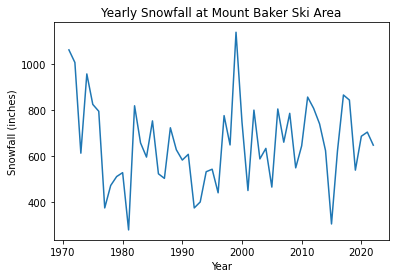

In [19]:
y = data['Total Snowfall']
x = data['Years']

plt.plot(x, y)
plt.ylabel('Snowfall (inches)')
plt.xlabel('Year')
plt.title('Yearly Snowfall at Mount Baker Ski Area')
plt.show()

#### Constructing a loop to calculate error values.

---

In [20]:
mean_snowfall = np.mean(y)
error_values = []
for value in y:
    difference = round(mean_snowfall - value)
    error_values.append(difference)
print(error_values)

[-409, -354, 42, -304, -171, -141, 281, 183, 144, 127, 377, -165, -3, 59, -99, 132, 152, -69, 27, 72, 47, 281, 255, 123, 112, 215, -122, 6, -486, -94, 205, -146, 67, 21, 190, -151, -6, -132, 106, 10, -203, -154, -86, 31, 351, 32, -212, -190, 116, -32, -50, 7]


#### Plotting error values relative to the STD (Positive and Negative).

---

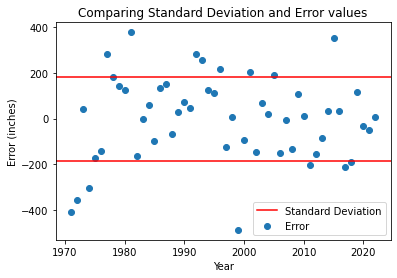

In [24]:
pos_std_snowfall = np.std(y)
neg_std_snowfall = -np.std(y)

plt.scatter(x, error_values)
plt.axhline(pos_std_snowfall, color='r', linestyle='-')
plt.gca().legend(('Standard Deviation','Error'))
plt.axhline(neg_std_snowfall, color='r', linestyle='-')
plt.ylabel('Error (inches)')
plt.xlabel('Year')
plt.title('Comparing Standard Deviation and Error values')
plt.show()

#### Adding error values to the dataframe.

---

In [28]:
data['Error Values'] = error_values
data = data.groupby('Error Values')

data.head()

,Years,Total Snowfall,Error Values
0,1971,1063,-409
1,1972,1008,-354
2,1973,612,42
3,1974,958,-304
4,1975,825,-171
5,1976,795,-141
6,1977,373,281
7,1978,471,183
8,1979,510,144
9,1980,527,127


#### Appending above and below average snowfalls into separate lists.

---

In [22]:
above_average = []
for n in error_values:
    if pos_std_snowfall < n:
        above_average.append(n)
print("Above Average Snowfall: %s" %(above_average))

below_average = []
for n in error_values:
    if neg_std_snowfall > n:
        below_average.append(n)
print("Below Average Snowfall: %s" %(below_average))

Above Average Snowfall: [281, 377, 281, 255, 215, 205, 190, 351]
Below Average Snowfall: [-409, -354, -304, -486, -203, -212, -190]


#### Fitting a trend line to the data.

---

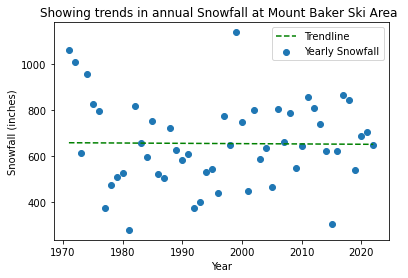

Slope: -0.14  The slope represents the yearly decline in annual snowfall, albeit small. 


In [29]:
m, b = np.polyfit(x, y, 1)

plt.scatter(x, y)
plt.plot(x, m*x + b, color = 'g', linestyle='--')
plt.gca().legend(('Trendline','Yearly Snowfall'))
plt.ylabel('Snowfall (inches)')
plt.xlabel('Year')
plt.title('Showing trends in annual Snowfall at Mount Baker Ski Area ')
plt.show()

print("Slope: %3.2f" %(m),' The slope represents the yearly decline in annual snowfall, albeit small. ')

#### Calculating the R-squared value of the trendline.

---

In [27]:
corr_matrix = np.corrcoef(x, y)
corr = corr_matrix[0,1]
R_sq = corr**2
 
print("Mount Baker annual snowfall R-Squared value: %5.4f" %(R_sq))
print('Only 0.01% of the variation can be accounted for by the trendline.')

Mount Baker annual snowfall R-Squared value: 0.0001
Only 0.01% of the variation can be accounted for by the trendline.


#### Reading Nooksack river discharge data.
 
 ---

In [34]:
nooksack_discharge = pd.read_csv("NooksackRiver_Discharge.csv")
discharge = nooksack_discharge['Discharge']
x = nooksack_discharge['Water Year']

#### Running the discharge data through a loop to convert it to the type float before plotting it.
---

In [ ]:
y = [0]*len(discharge)
i = 0
for i in range(len(discharge)):
    y[i] = float(discharge[i].replace(',', ''))
    i =+ 1
print(y)
print(type(y[0]))

#### Why the previous step is necessary:

---

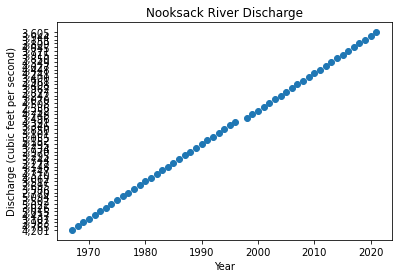

In [38]:
plt.scatter(x, discharge)
plt.title('Nooksack River Discharge')
plt.xlabel('Water Year')
plt.ylabel('Discharge (cubic feet per second)')
plt.show()

#### Plotting discharge and water year.

---

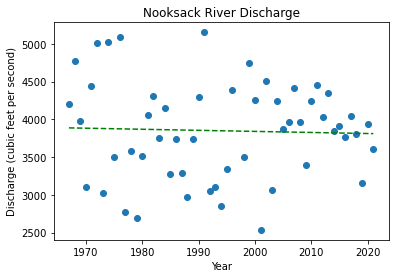

Slope: -0.14  The slope represents the yearly decline in Nooksack River Flowrate 


In [40]:
m1, b1 = np.polyfit(x, y, 1)

plt.scatter(x, y)
plt.plot(x, m1*x + b1, color = 'g', linestyle='--')
plt.title('Nooksack River Discharge')
plt.xlabel('Year')
plt.ylabel('Discharge (cubic feet per second)')
plt.show()

print("Slope: %3.2f" %(m),' The slope represents the yearly decline in Nooksack River Flowrate ')

#### Calculating R-squared for the Nooksack river trendline.

---

In [41]:
corr_matrix = np.corrcoef(x, y)
corr = corr_matrix[0,1]
R_sq = corr**2
 
print("Nooksack discharge R-Squared Value: %5.4f" %(R_sq))

Nooksack discharge R-Squared Value: 0.0012
